In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [2]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C', 'L', 'D', 'S']] for x in ['1C', '5Q', '2I', '5P']], [])
# measurements_RINEX = ['L1C', 'L5Q']
# # 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

log = LogReader(manufacturer="Google", device="Pixel 7", specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixel7_20230801110405_modified.txt")
log.ref = RinexReader('Reference', 
            filepath='../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.pos')
logs.append(log)

log = LogReader(manufacturer="Google", device="Pixel Watch", specifiedTags=measurements_log, mode="mimir", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixelWatch_20230801110404_modified.txt")
log.ref = RinexReader('Reference', 
            filepath='../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.pos')
logs.append(log)

log = LogReader(manufacturer="OnePlus", device="Nord 2", specifiedTags=measurements_log, mode="mimir", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_OnePlusNord2_20230811103018_modified.txt")
log.ref = RinexReader('Reference', 
            filepath='../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-40-20.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-40-20.pos')
logs.append(log)

log = LogReader(manufacturer="Samsung", device="A52", specifiedTags=measurements_log, mode="mimir", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_SamsungA52_20230811101903_modified.txt")
log.ref = RinexReader('Reference', 
            filepath='../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-29-33.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-29-33.pos')
logs.append(log)

log = LogReader(manufacturer="Xiaomi", device="11T", specifiedTags=measurements_log, mode="mimir", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_Xiaomi11T_20230801111451_modified.txt")
log.ref = RinexReader('Reference', 
            filepath='../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-24-35.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-24-35.pos')
logs.append(log)

device_list = [log.device for log in logs]

In [3]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


,CarrierFrequencyHz
datetime,
2023-08-01 08:14:54.293,1.176450e+09
2023-08-01 08:14:56.307,1.176450e+09
2023-08-01 08:14:59.151,1.176450e+09
2023-08-01 08:15:01.126,1.176450e+09
2023-08-01 08:15:02.142,1.176450e+09
...,...
2023-08-01 08:24:12.161,1.176450e+09
2023-08-01 08:24:13.158,1.176450e+09
2023-08-01 08:24:17.149,1.176450e+09


In [4]:
log.pos.df

,provider,timestamp,latitude,longitude,altitude
datetime,,,,,
2023-08-01 08:14:36,REF,1.690878e+09,61.449224,23.856273,163.0371
2023-08-01 08:14:37,REF,1.690878e+09,61.449224,23.856273,163.0365
2023-08-01 08:14:38,REF,1.690878e+09,61.449224,23.856272,163.0390
2023-08-01 08:14:39,REF,1.690878e+09,61.449225,23.856269,163.0332
2023-08-01 08:14:40,REF,1.690878e+09,61.449222,23.856274,162.7518
...,...,...,...,...,...
2023-08-01 08:24:31,REF,1.690878e+09,61.449222,23.856280,163.1328
2023-08-01 08:24:32,REF,1.690878e+09,61.449220,23.856276,163.0274
2023-08-01 08:24:33,REF,1.690878e+09,61.449219,23.856277,163.0225


In [5]:
log.ref.df

,time,sv,signal,doppler,phase,pseudorange,snr,prn,system,frequency,pseudorange_rate,pseudorange_error,phase_rate,phase_error,doppler_error
0,2023-08-01 08:14:54,C05,2I,28.398,2.084847e+08,4.003730e+07,40.407,C05-L1,C,L1,NaN,NaN,NaN,NaN,NaN
1,2023-08-01 08:14:54,C08,2I,-1286.781,2.034746e+08,3.907515e+07,43.951,C08-L1,C,L1,NaN,NaN,NaN,NaN,NaN
2,2023-08-01 08:14:54,C13,2I,-1032.277,1.988116e+08,3.817968e+07,48.422,C13-L1,C,L1,NaN,NaN,NaN,NaN,NaN
3,2023-08-01 08:14:54,C19,2I,3001.274,1.262413e+08,2.424329e+07,49.173,C19-L1,C,L1,NaN,NaN,NaN,NaN,NaN
4,2023-08-01 08:14:54,C19,5P,2261.795,9.513597e+07,2.424330e+07,50.647,C19-L5,C,L5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2023-08-01 08:24:23,R09,1C,-3136.277,1.191103e+08,2.230561e+07,43.912,R09-L1,R,L1,587.258,0.167,3135.855,0.734,-0.576
24801,2023-08-01 08:24:23,R10,1C,-67.903,1.156311e+08,2.169217e+07,40.150,R10-L1,R,L1,12.621,0.141,67.392,0.957,-0.727
24802,2023-08-01 08:24:23,R17,1C,-3981.041,1.232831e+08,2.303847e+07,45.619,R17-L1,R,L1,743.913,0.026,3980.813,0.179,-0.247
24803,2023-08-01 08:24:23,R18,1C,-1723.238,1.046144e+08,1.959788e+07,51.452,R18-L1,R,L1,322.771,0.105,1722.957,0.570,-0.403


In [6]:
# only keep GPS provider
log.fix = log.fix.loc[log.fix["provider"] == 'GPS']

In [7]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
for log in logs:
    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')

    print(f"--- {log.device} ---")
    print(log.diff[["east", "north", "up", "2D_error", "3D_error"]].describe())

--- Pixel 7 ---
             east       north          up    2D_error    3D_error
count  627.000000  627.000000  627.000000  627.000000  627.000000
mean     0.371880   -0.444763   -6.927663    1.824681    7.572412
std      1.300549    1.969238    3.090132    1.603494    2.468003
min     -6.172954   -6.211736  -20.060630    0.078894    1.564468
25%     -0.010505   -1.351840   -7.954781    0.922860    6.305800
50%      0.329247   -0.965794   -6.629866    1.448422    6.875208
75%      0.807818   -0.008581   -6.038846    2.067478    8.150087
max     10.772448   14.858674   20.332651   15.984926   25.863770
--- Pixel Watch ---
             east       north          up    2D_error    3D_error
count  862.000000  862.000000  862.000000  862.000000  862.000000
mean     0.935102   -0.329131   -4.134536    2.725511    6.345669
std      2.034178    2.443932    5.341635    1.912466    4.053097
min     -9.294852  -11.117086  -34.250484    0.167605    0.496471
25%     -0.028827   -1.728611   -7.23448

In [8]:
log.diff

,east,north,up,2D_error,3D_error
datetime,,,,,
2023-08-01 08:14:55,2.220516,1.263836,-10.387199,2.554990,10.696817
2023-08-01 08:14:56,1.716423,0.907118,-11.191900,1.941384,11.359031
2023-08-01 08:14:57,1.751256,0.606603,-11.258566,1.853339,11.410091
2023-08-01 08:14:58,1.727945,0.271095,-11.324333,1.749082,11.458613
2023-08-01 08:14:59,1.735093,-0.028195,-11.398700,1.735322,11.530035
...,...,...,...,...,...
2023-08-01 08:24:31,0.253807,0.616150,-11.967200,0.666377,11.985739
2023-08-01 08:24:32,0.062892,0.378896,-12.072600,0.384080,12.078708
2023-08-01 08:24:33,0.100659,0.281943,-12.077500,0.299373,12.081210


# Results

In [9]:
center = ref_enu[:2]
extent = [center[1] - 0.001, center[1] + 0.006, center[0] - 0.0005, center[0] + 0.0015]

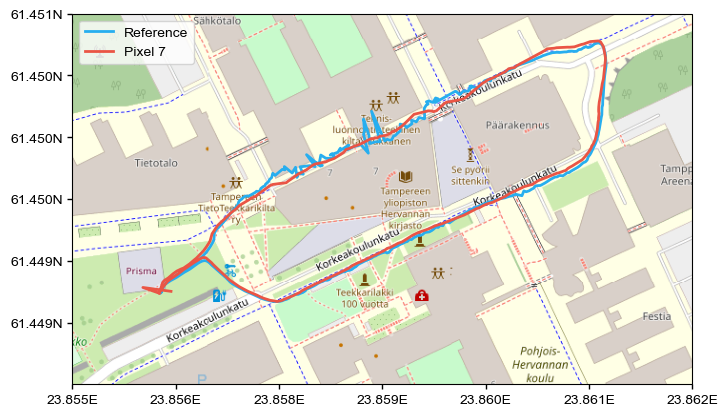

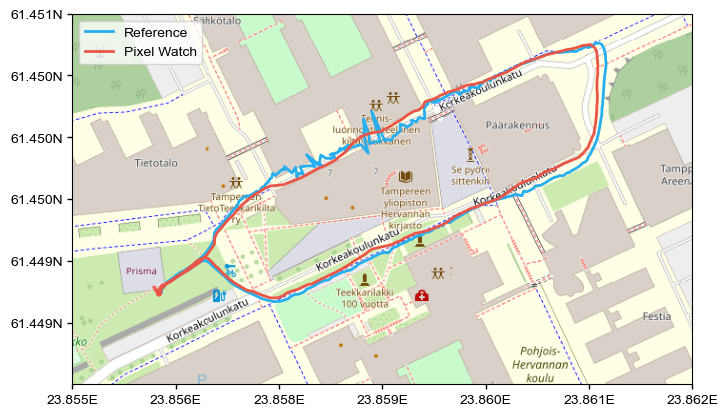

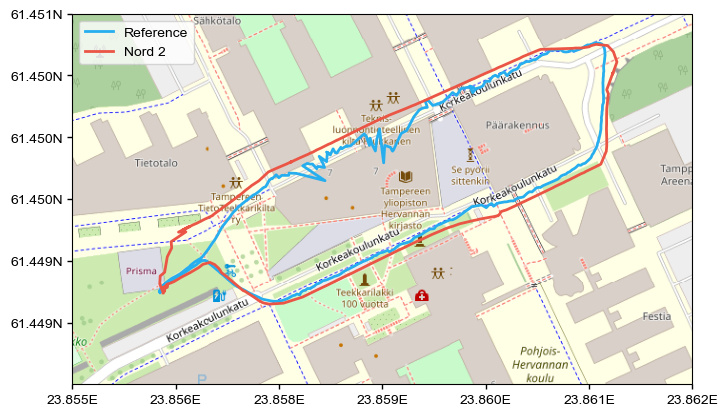

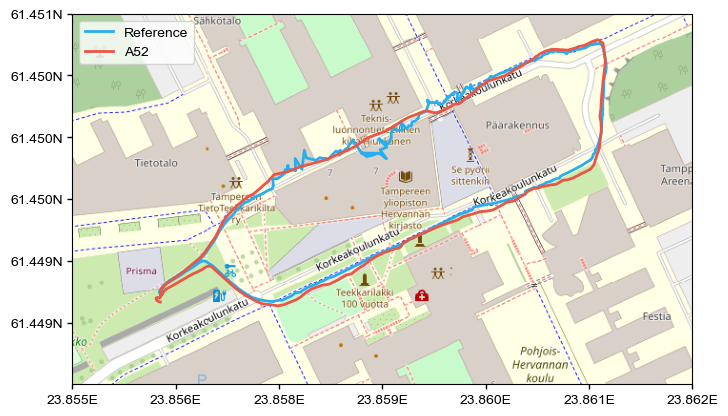

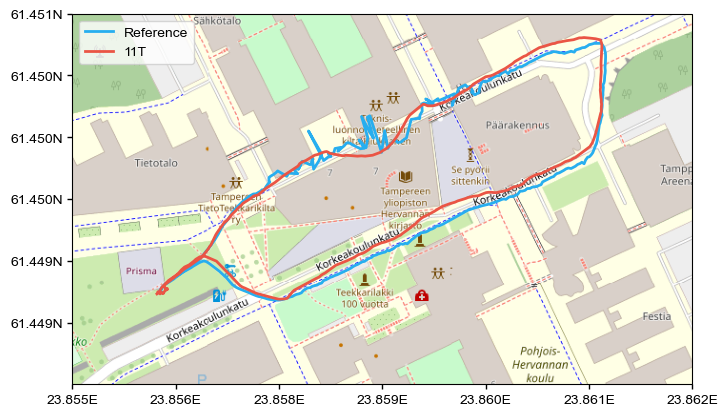

In [10]:

for log in logs:
    locations = {}
    locations['Reference'] = log.pos.df[["latitude", "longitude"]]
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
    plotMap(locations=locations, extent=extent, scale=17)

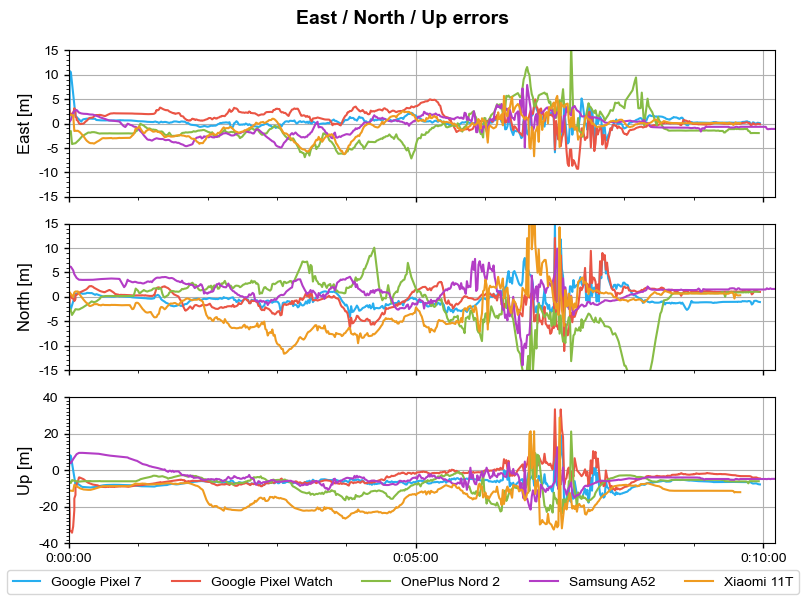

In [11]:
plotENU(logs, lim=[15,15,40], ticks=[1, 5, 1, 5, 2, 20], mode='difference')

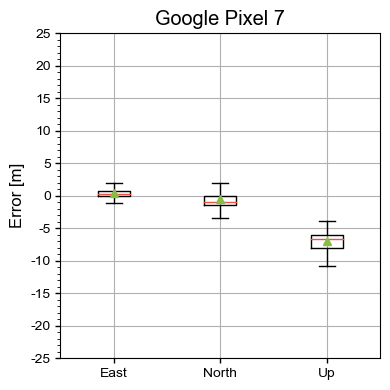

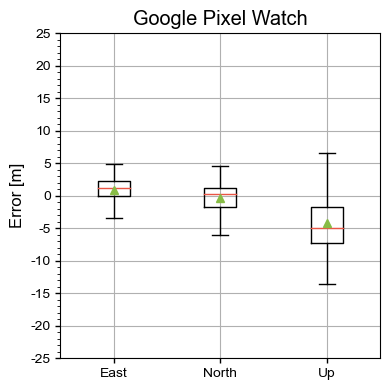

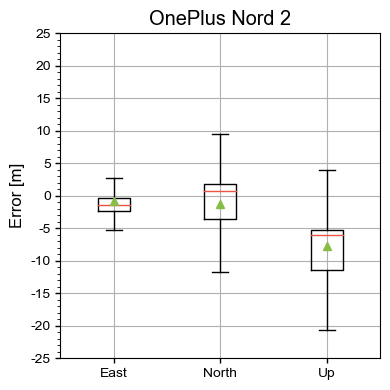

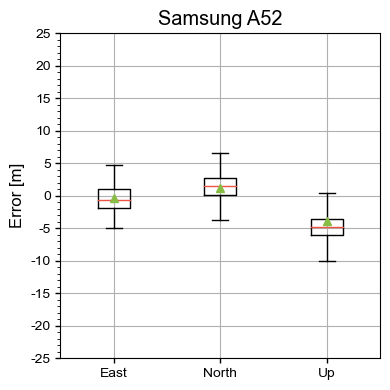

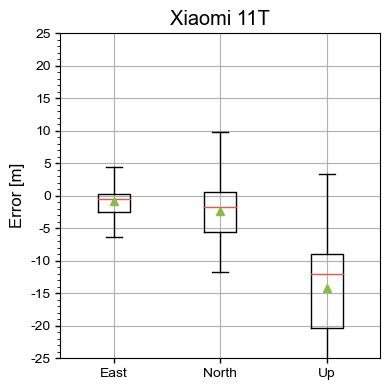

In [12]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

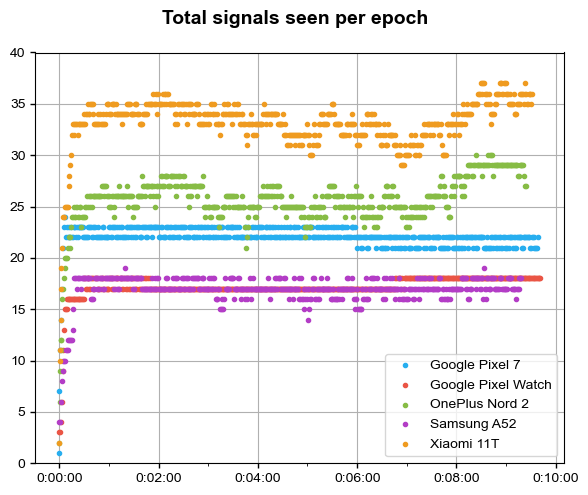

In [13]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 120], mode='signal')

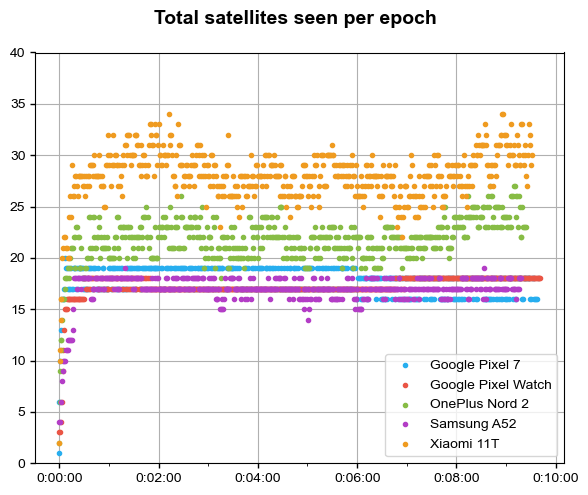

In [35]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 120], mode='satellite')

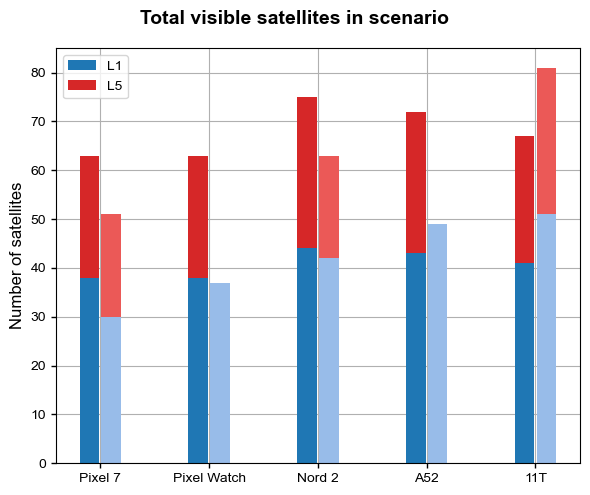

In [14]:
plotTotalSatellitesBar(logs, normalised=False)

### Measurements

Pseudoranges

--- Pixel 7 ---
Rows removed 7 (0.058%)
--- Pixel Watch ---
Rows removed 15 (0.165%)
--- Nord 2 ---
Rows removed 90 (0.648%)
--- A52 ---
Rows removed 2 (0.022%)
--- 11T ---
Rows removed 131 (0.733%)
            Pixel 7  Pixel Watch        Nord 2          A52           11T
count  12018.000000  9068.000000  13805.000000  9201.000000  17734.000000
mean       0.124266     0.412511      0.553043     0.090261      0.280861
std        9.751511    18.186163     13.839678    15.079990     13.037994
min     -153.535509  -296.117558   -128.523523  -273.992238    -99.589489
50%        0.130270     0.152443      0.410159     0.105149      0.067308
66.7%      1.423095     1.971097      2.294482     1.770599      2.030527
95%       12.954853    20.372765     20.209591    19.243106     21.498014
99.7%     42.189841   110.580509     70.168420    68.167153     59.438550
max      246.958558   226.721222    138.471306   195.191331    143.734794


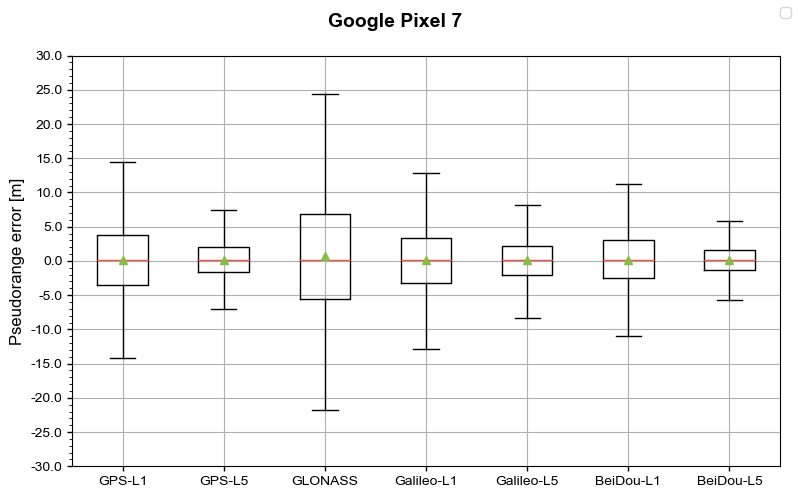

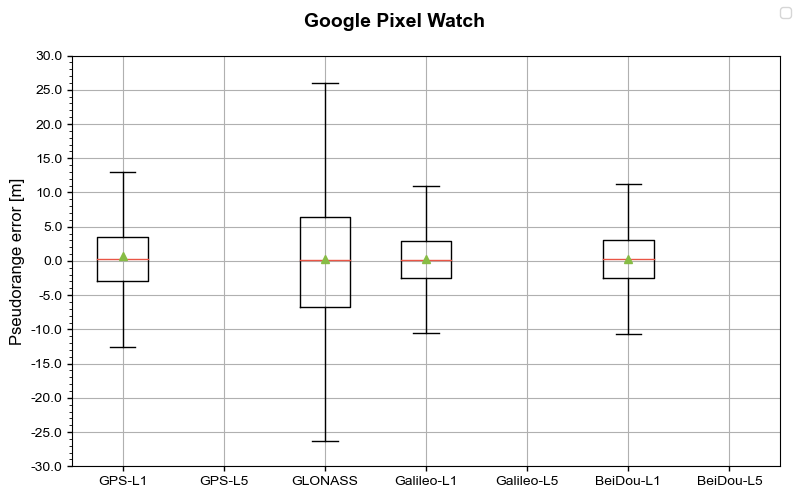

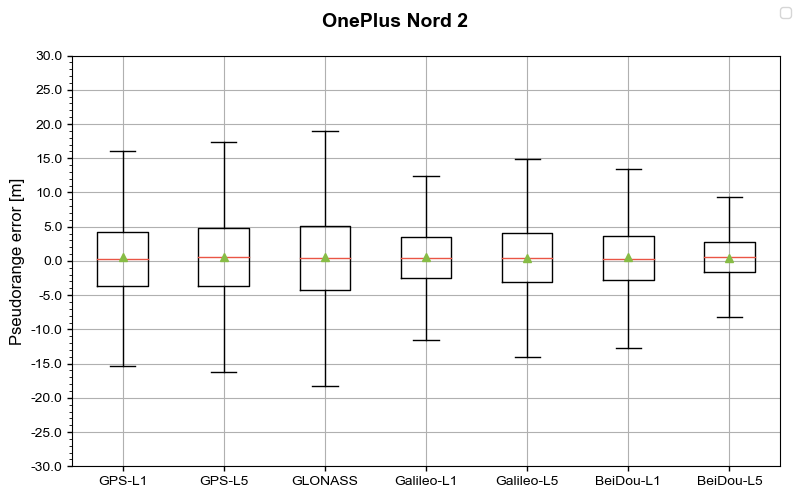

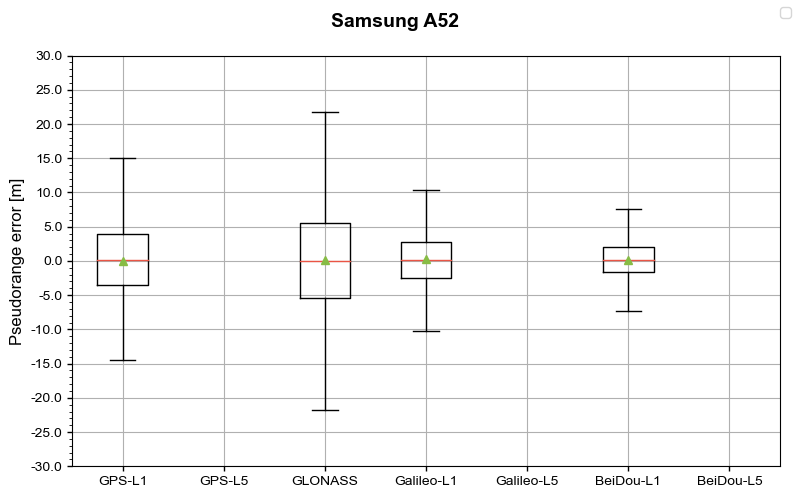

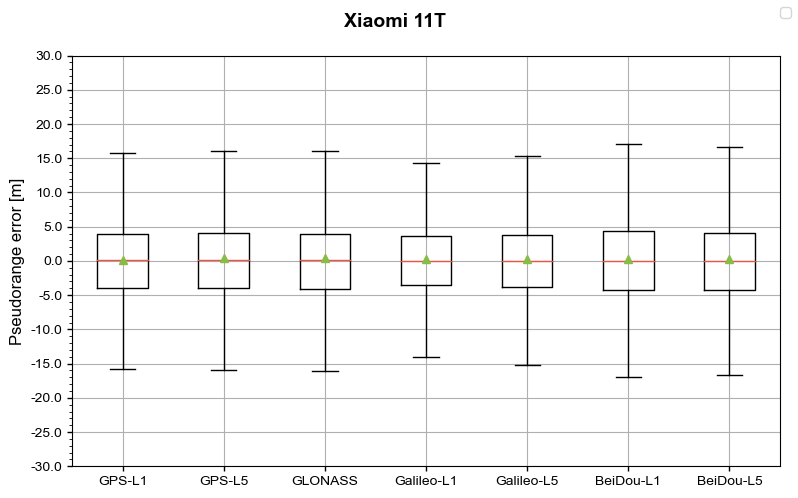

In [15]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5])


--- Pixel 7 ---
Rows removed 1389 (5.376%)
--- Pixel Watch ---
Rows removed 1390 (5.346%)
--- Nord 2 ---
Rows removed 1550 (5.618%)
--- A52 ---
Rows removed 1569 (5.670%)
--- 11T ---
Rows removed 1413 (5.725%)
            Pixel 7   Pixel Watch        Nord 2           A52           11T
count  24447.000000  24609.000000  26041.000000  26102.000000  23268.000000
mean       0.122704      0.122131      0.018646      0.136095      0.161068
std       23.428013     23.350781     20.820157     19.585639     19.905765
min     -299.829000   -299.829000   -295.142000   -299.977000   -299.723000
50%        0.075000      0.075000      0.073000      0.074000      0.075000
66.7%      0.120000      0.120000      0.115000      0.117000      0.120000
95%        0.596000      0.593600      0.550000      0.609950      0.611000
99.7%    223.673012    223.465976    189.979120    153.178263    200.269388
max      299.897000    299.897000    294.029000    298.300000    297.868000


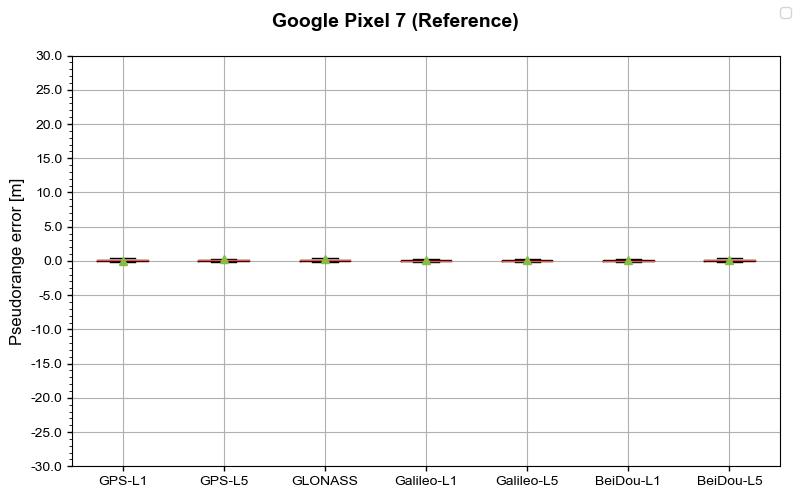

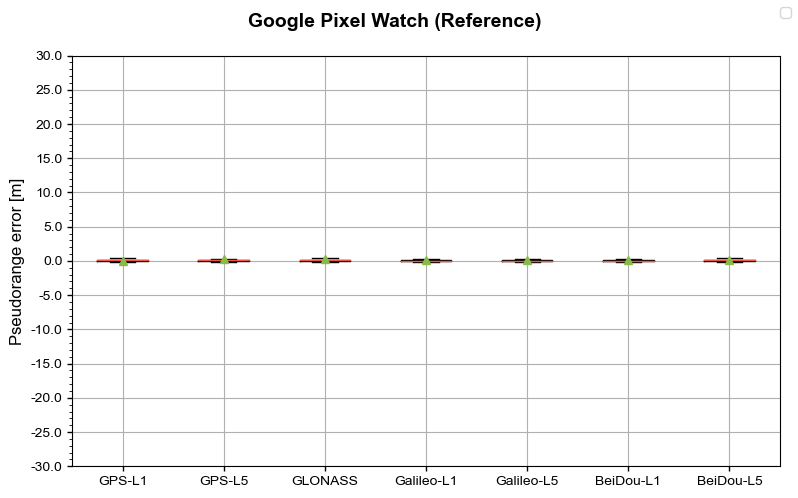

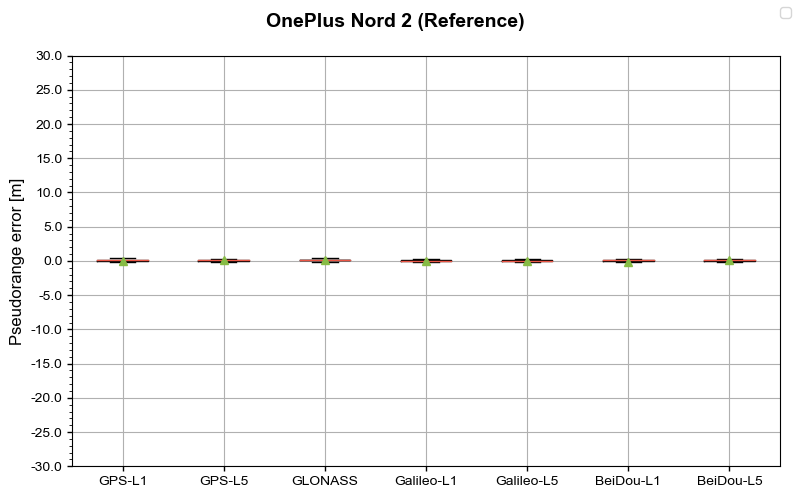

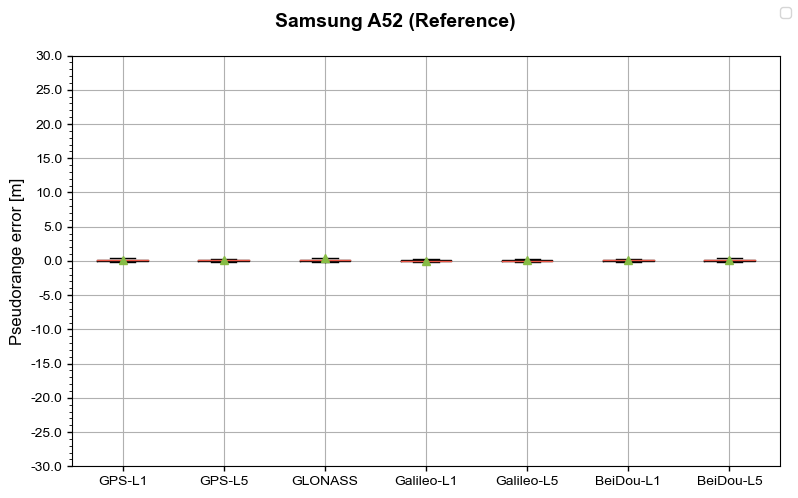

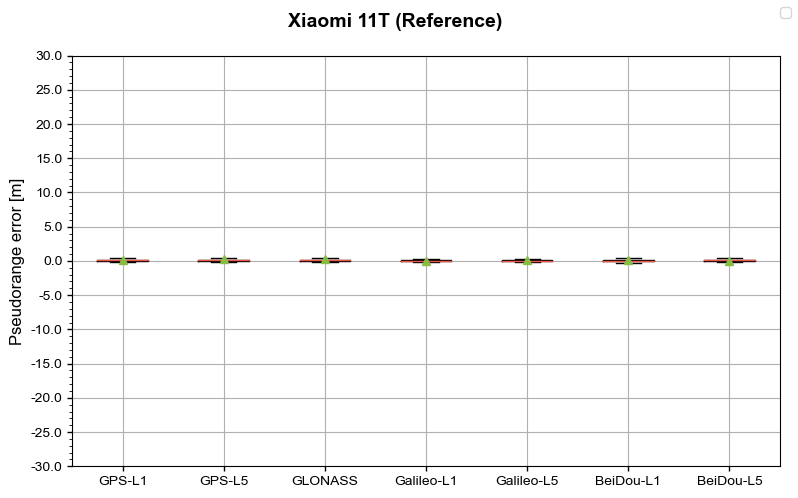

In [16]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'pseudorange_error', 300)
    stats.append(log.ref.df['pseudorange_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'pseudorange_error', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5],
                      mode='ref')


In [17]:
_logs = copy.deepcopy(logs)
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssState_Str.values())].count()
    df = log.raw[list(misc.GnssState_Str.values())].sum().div(count).mul(100).transpose()
    print(df)

--- Pixel 7 ---
TRACK_UNKNOWN                   0.000000
TRACK_CODE_LOCK                72.781296
TRACK_BIT_SYNC                 75.768238
TRACK_SUBFRAME_SYNC            45.617327
TRACK_TOW_DECODED              36.953632
TRACK_MSEC_AMBIGUOUS            0.523888
TRACK_SYMBOL_SYNC              75.799515
TRACK_GLO_STRING_SYNC           2.423958
TRACK_GLO_TOD_DECODED           2.197201
TRACK_BDS_D2_BIT_SYNC           0.000000
TRACK_BDS_D2_SUBFRAME_SYNC      0.000000
TRACK_GAL_E1BC_CODE_LOCK       14.989444
TRACK_GAL_E1C_2ND_CODE_LOCK    27.562749
TRACK_GAL_E1B_PAGE_SYNC         0.000000
TRACK_SBAS_SYNC                 0.000000
TRACK_TOW_KNOWN                96.989600
TRACK_GLO_TOD_KNOWN             2.455235
TRACK_S_2ND_CODE_LOCK          62.280084
dtype: float64
--- Pixel Watch ---
TRACK_UNKNOWN                   0.000000
TRACK_CODE_LOCK                63.412445
TRACK_BIT_SYNC                 85.251296
TRACK_SUBFRAME_SYNC            45.991225
TRACK_TOW_DECODED              45.592341
TRACK_

Doppler

--- Pixel 7 ---
Rows removed 0 (0.000%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 1 (0.007%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)
            Pixel 7  Pixel Watch        Nord 2          A52           11T
count  12738.000000  9991.000000  14510.000000  9411.000000  18909.000000
mean       0.075958     0.098080      0.317093     0.057992      0.006854
std        0.394933     0.374276      2.073268     0.650847      1.084866
min       -5.145190    -6.700270    -22.043684   -12.501771    -19.210938
50%        0.072259     0.093999      0.411657     0.061813      0.068526
66.7%      0.147373     0.186911      0.895515     0.257186      0.349689
95%        0.637539     0.638722      2.427668     1.090386      1.308547
99.7%      1.816113     1.608383     10.079438     2.109778      3.623602
max       10.059676     6.036480     13.690755     7.767997     21.976807


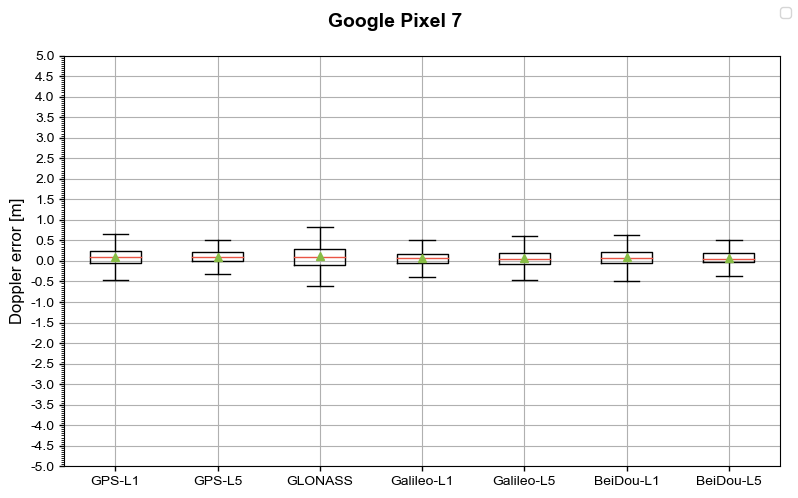

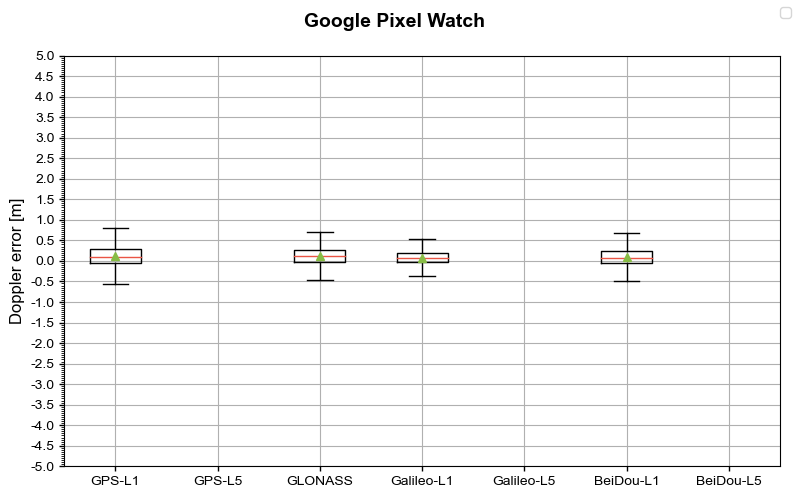

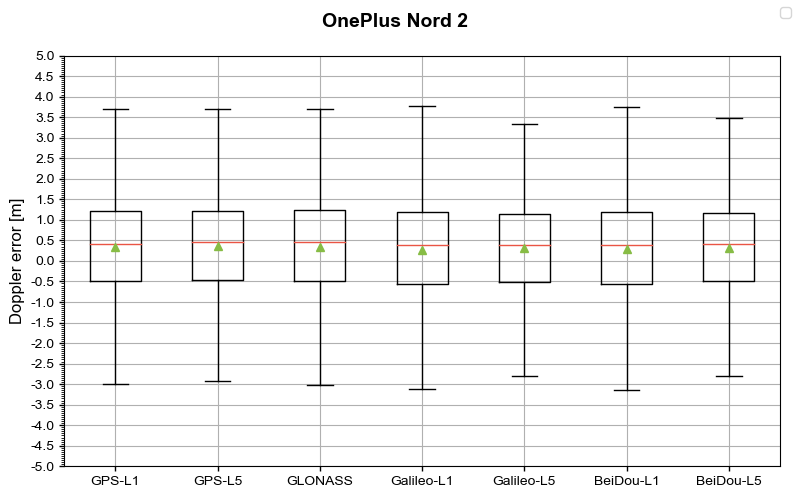

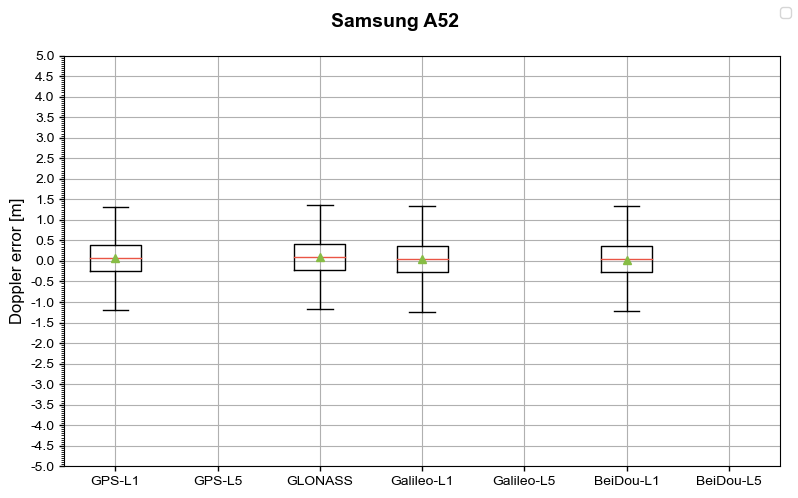

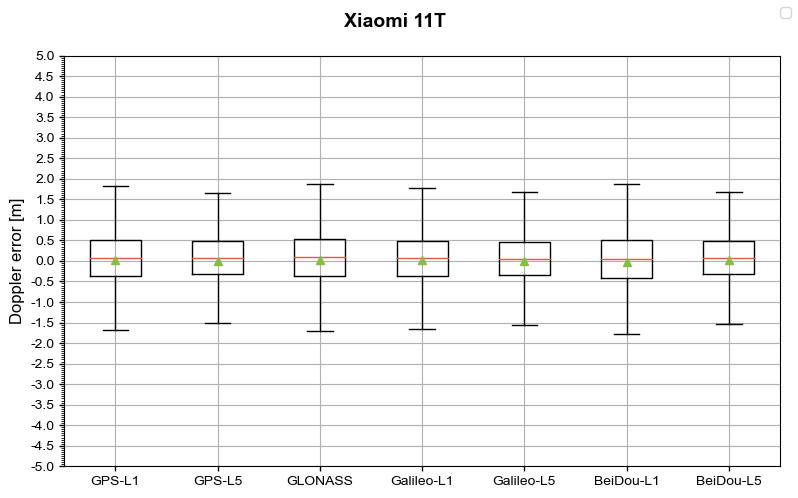

In [28]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=5,
                      ticks=[0.05,0.5])

--- Pixel 7 ---
Rows removed 15 (0.058%)
--- Pixel Watch ---
Rows removed 15 (0.058%)
--- Nord 2 ---
Rows removed 13 (0.047%)
--- A52 ---
Rows removed 10 (0.036%)
--- 11T ---
Rows removed 19 (0.077%)
            Pixel 7   Pixel Watch        Nord 2           A52           11T
count  25881.000000  26044.000000  27648.000000  27729.000000  24723.000000
mean      -0.434969     -0.433272     -0.406191     -0.413881     -0.433168
std        1.985353      1.979501      1.974203      2.030088      2.167714
min      -29.563000    -29.563000    -29.725000    -29.247000    -29.745000
50%       -0.334000     -0.332000     -0.319000     -0.328000     -0.329000
66.7%      0.025000      0.024000      0.041000      0.024000      0.049000
95%        1.800000      1.794850      1.924000      1.766000      1.954700
99.7%      6.774440      6.771839      7.017121      8.351688      8.657352
max       23.425000     23.425000     21.530000     27.032000     26.956000


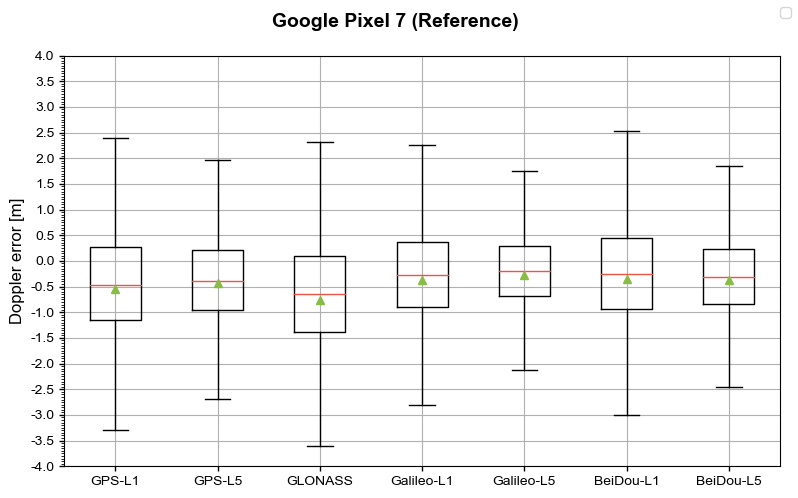

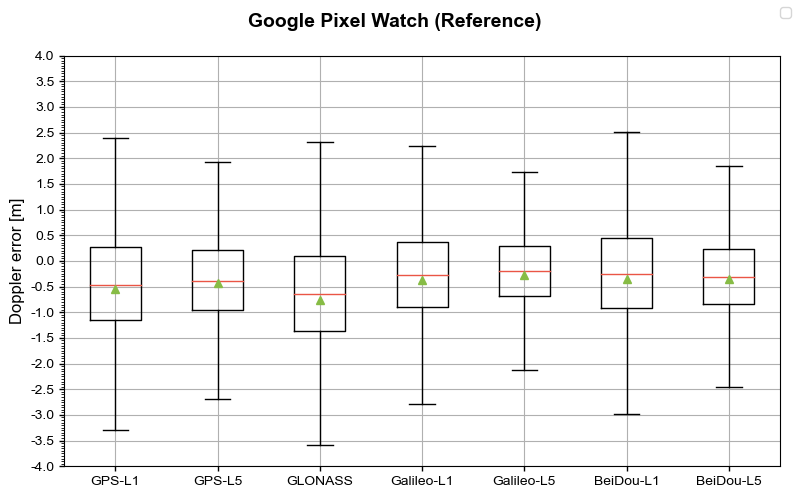

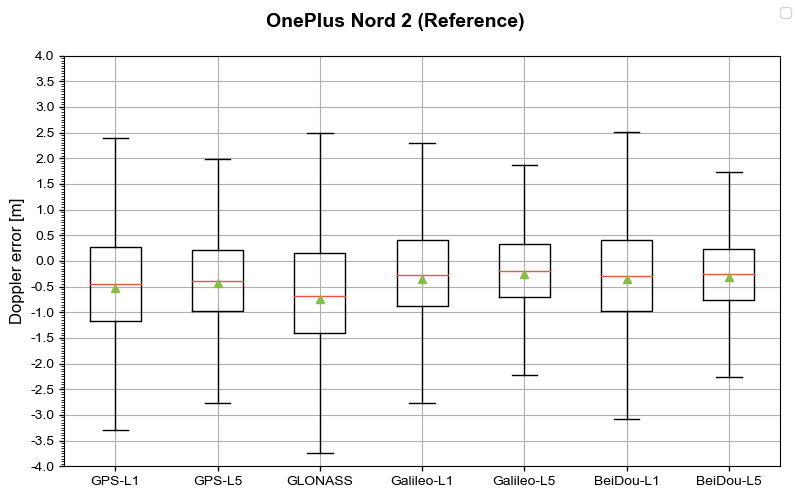

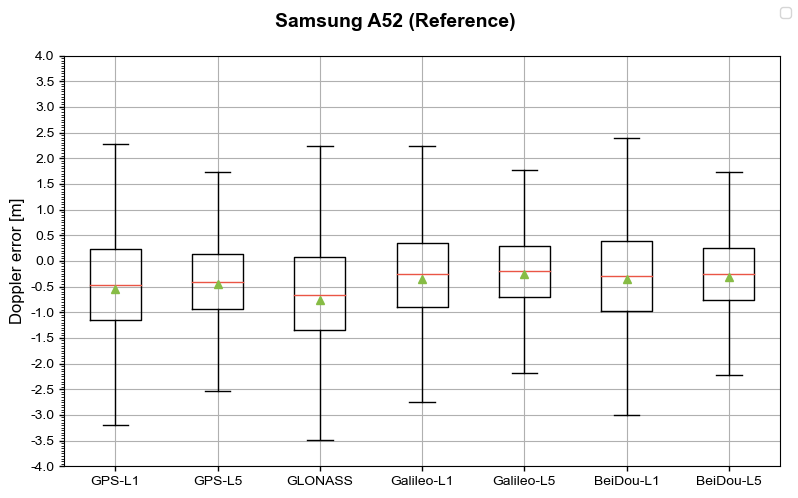

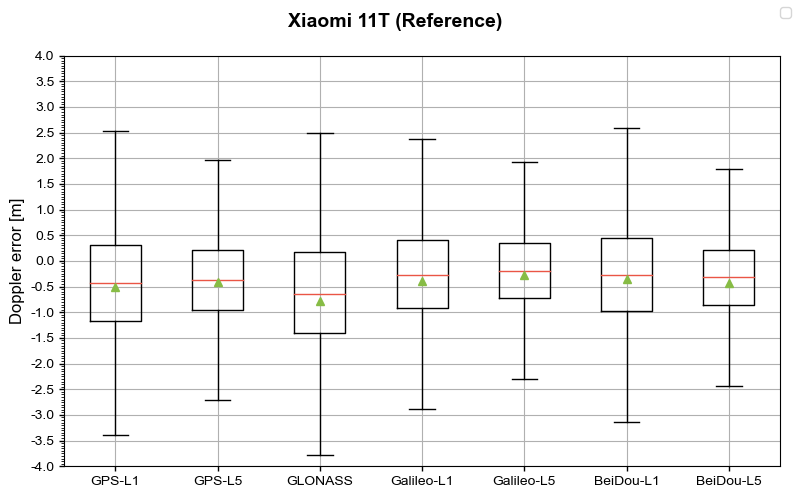

In [19]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'doppler_error', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'doppler_error', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.05,0.5],
                      mode='ref')

Phases

--- Pixel 7 ---
Rows removed 218 (1.718%)
--- Pixel Watch ---
Rows removed 97 (0.974%)
--- Nord 2 ---
Rows removed 1435 (9.932%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 736 (3.909%)
            Pixel 7  Pixel Watch        Nord 2          A52           11T
count  12470.000000  9857.000000  13013.000000  9363.000000  18092.000000
mean       0.075095     0.097399      0.310543     0.059795      0.057394
std        0.376290     0.361435      1.225806     0.649776      0.869771
min       -5.145190    -6.700270     -5.650226   -12.501771    -10.546082
50%        0.072394     0.094265      0.402069     0.063192      0.078133
66.7%      0.146343     0.186862      0.850376     0.258753      0.354272
95%        0.624109     0.635610      2.124824     1.091176      1.274882
99.7%      1.683756     1.522154      3.930301     2.110481      3.057930
max        4.176464     3.076851     11.221985     7.767997     17.826782


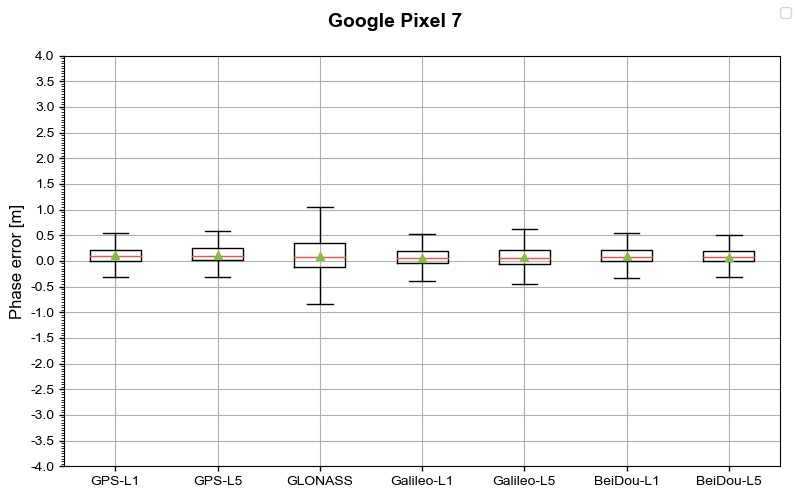

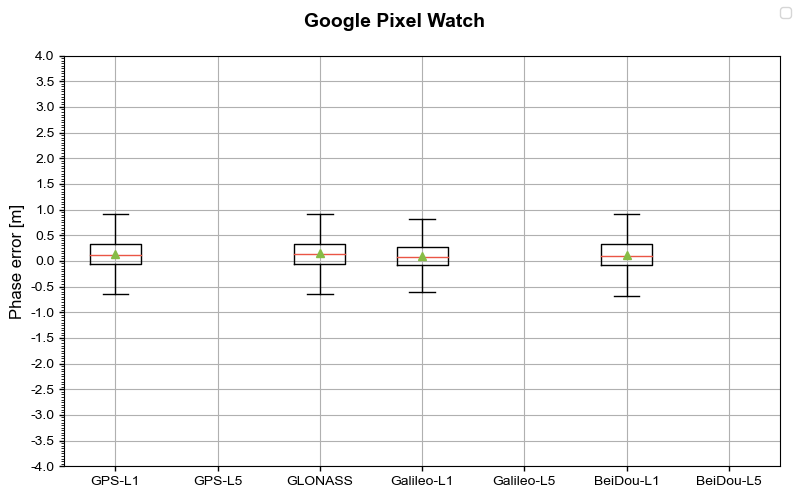

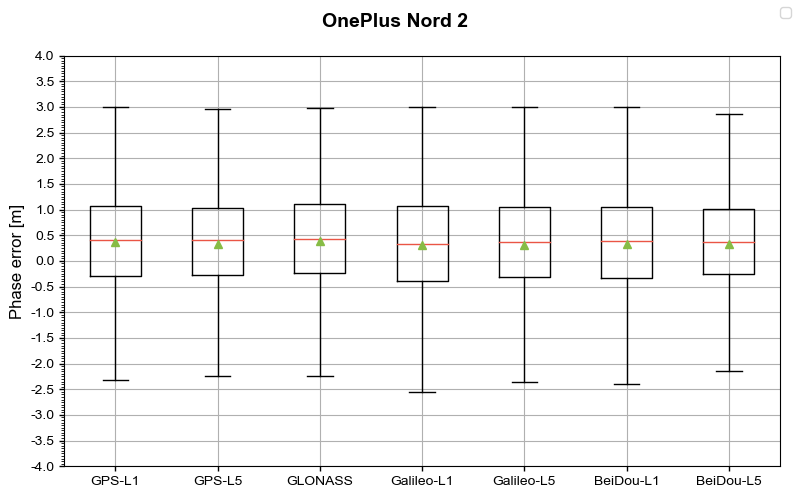

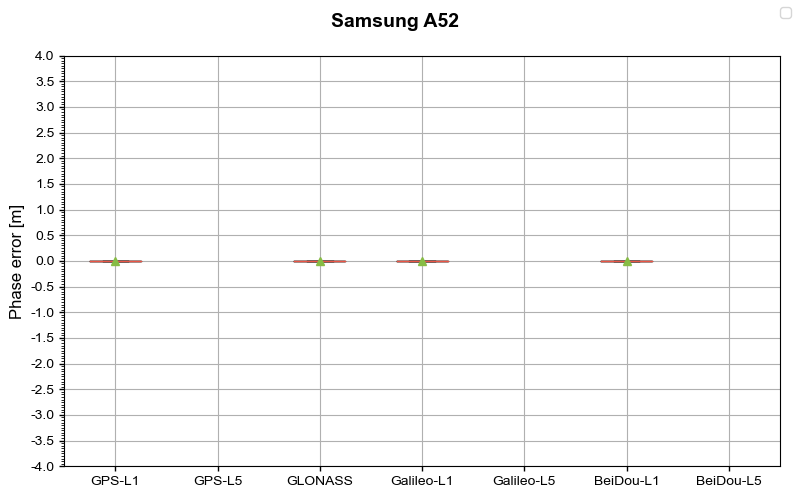

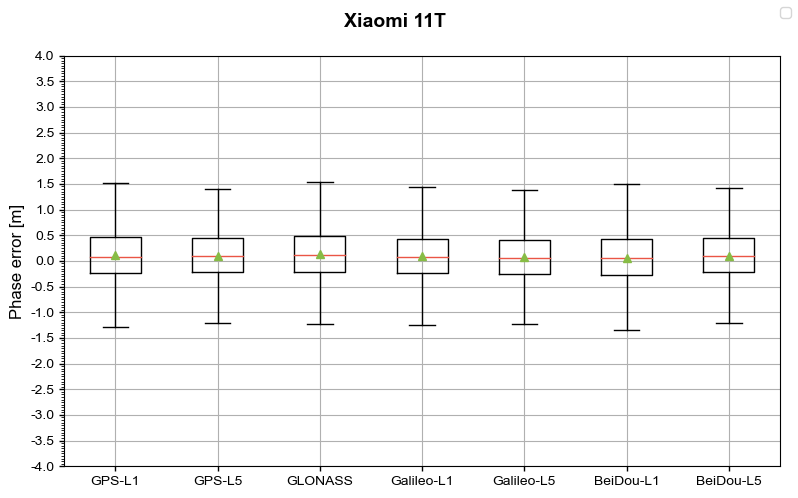

In [33]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 3)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))
plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.05,0.5])
    

--- Pixel 7 ---
Rows removed 1627 (6.297%)
--- Pixel Watch ---
Rows removed 1628 (6.262%)
--- Nord 2 ---
Rows removed 1751 (6.346%)
--- A52 ---
Rows removed 1745 (6.306%)
--- 11T ---
Rows removed 1596 (6.467%)
            Pixel 7   Pixel Watch        Nord 2           A52           11T
count  24209.000000  24371.000000  25840.000000  25926.000000  23085.000000
mean       0.381272      0.380233      0.223187      0.363047      0.339827
std       18.915576     18.852615     20.538860     17.000730     16.733850
min     -498.038000   -498.038000   -496.858000   -482.043000   -496.048000
50%        0.331000      0.330000      0.323000      0.330000      0.332000
66.7%      0.519000      0.516000      0.501000      0.512000      0.522000
95%        1.457600      1.455000      1.355050      1.398000      1.582800
99.7%     48.895072     48.438250     31.542443     44.445575     34.350316
max      497.996000    497.996000    482.348000    494.385000    494.432000


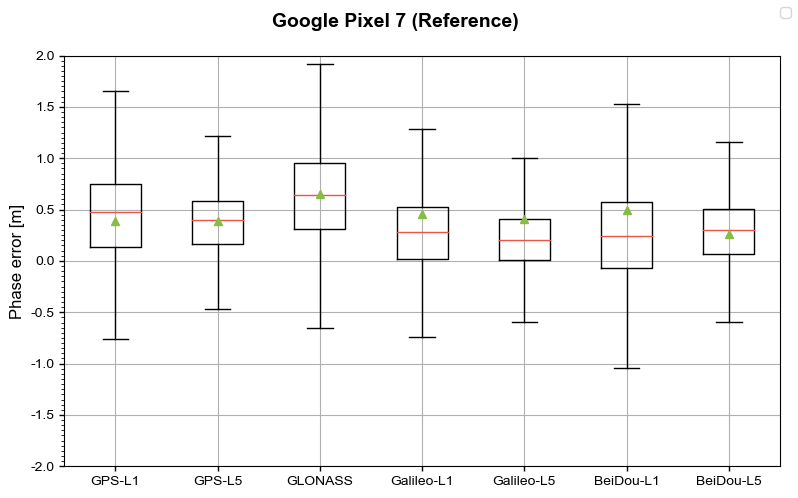

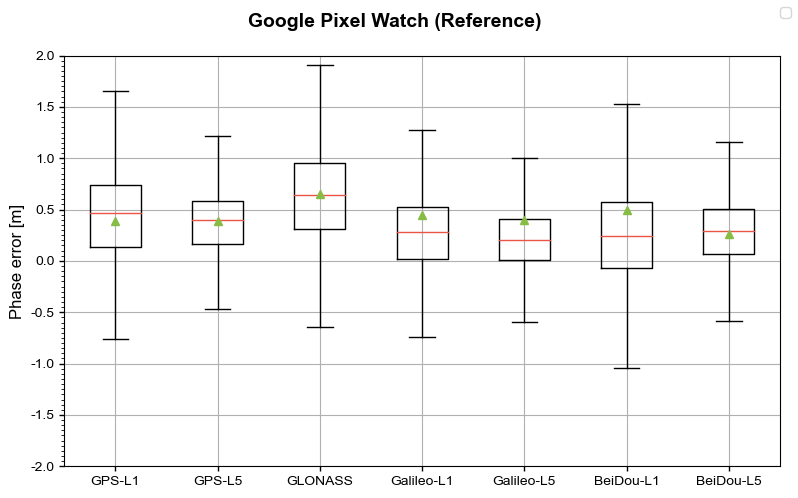

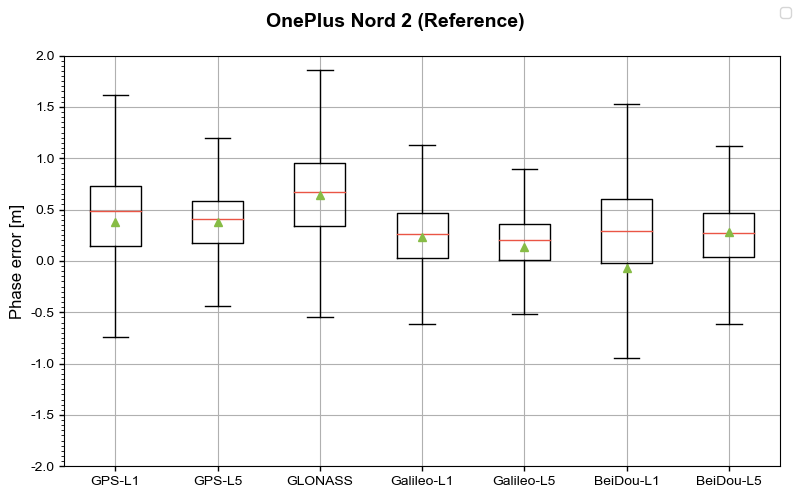

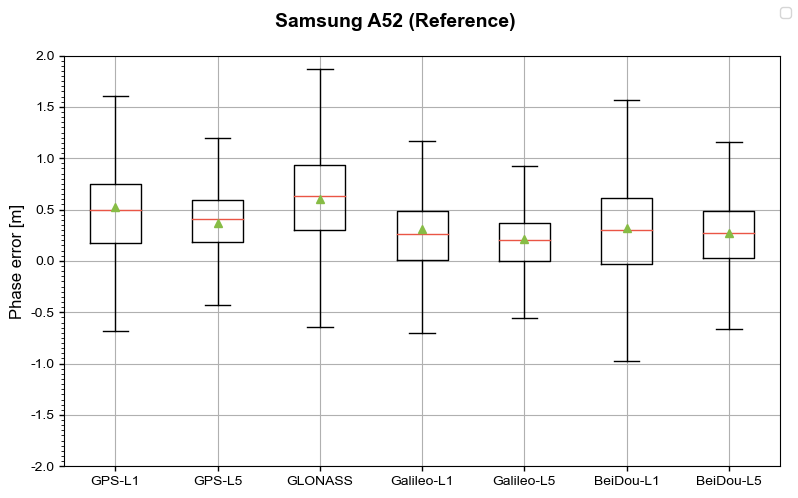

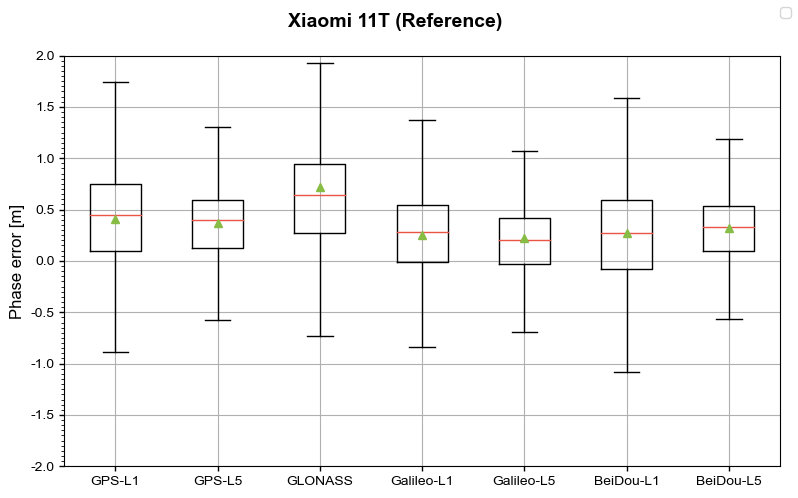

In [21]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'phase_error', 500)
    stats.append(log.ref.df['phase_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))
plotStatisticsDataBox(_logs, 
                      'phase_error', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5],
                      mode='ref')

In [22]:
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')


In [23]:
for log in _logs:
    print(f"--- {log.device} ---")
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    print(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count).mul(100))

--- Pixel 7 ---
ADR_UNKNOWN                  0.000000
ADR_VALID                   43.326296
ADR_RESET                    0.007819
ADR_CYCLE_SLIP               2.932207
ADR_HALF_CYCLE_RESOLVED     37.571350
ADR_HALF_CYCLE_REPORTED    100.000000
dtype: float64
--- Pixel Watch ---
ADR_UNKNOWN                  0.000000
ADR_VALID                   21.868767
ADR_RESET                    0.009972
ADR_CYCLE_SLIP               4.128440
ADR_HALF_CYCLE_RESOLVED     12.834065
ADR_HALF_CYCLE_REPORTED    100.000000
dtype: float64
--- Nord 2 ---
ADR_UNKNOWN                  0.000000
ADR_VALID                   65.925621
ADR_RESET                    0.000000
ADR_CYCLE_SLIP              27.672568
ADR_HALF_CYCLE_RESOLVED     41.608344
ADR_HALF_CYCLE_REPORTED    100.000000
dtype: float64
--- A52 ---
ADR_UNKNOWN                  0.0
ADR_VALID                    0.0
ADR_RESET                    0.0
ADR_CYCLE_SLIP               0.0
ADR_HALF_CYCLE_RESOLVED      0.0
ADR_HALF_CYCLE_REPORTED    100.0
dtype: flo

C/N0

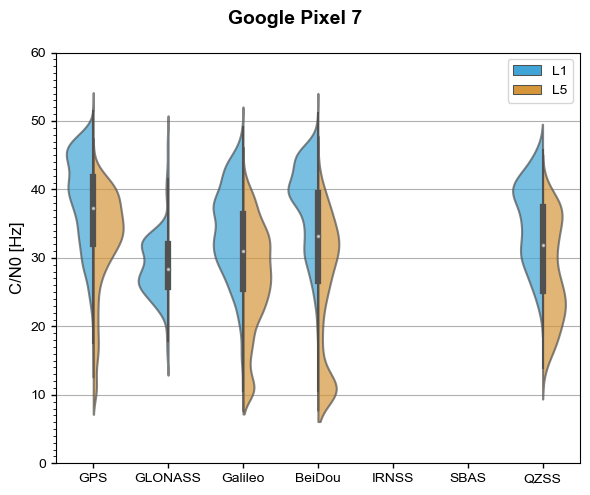

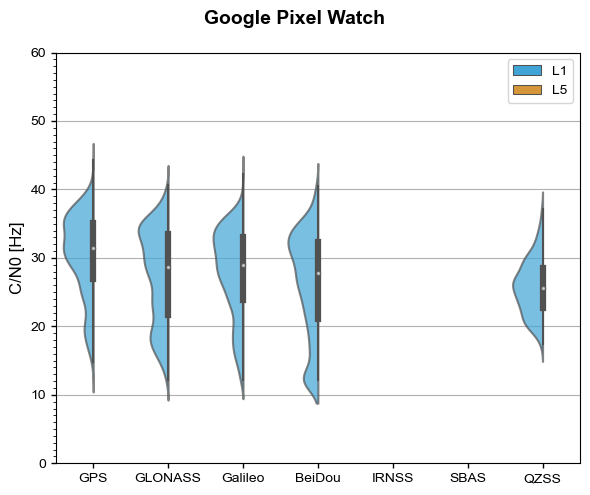

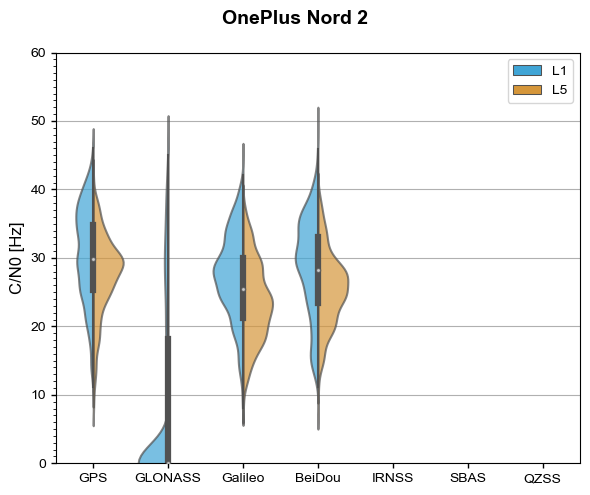

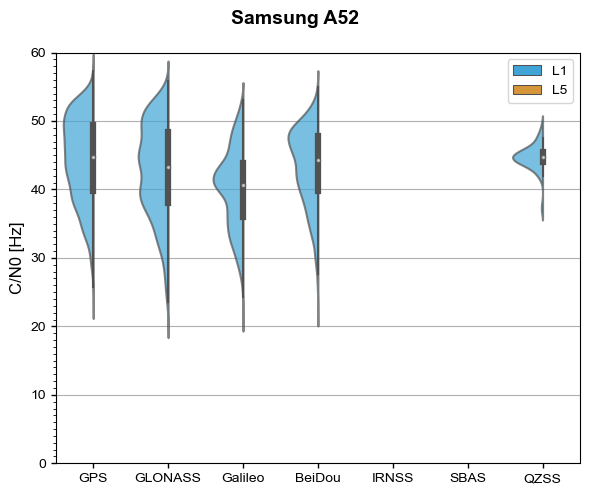

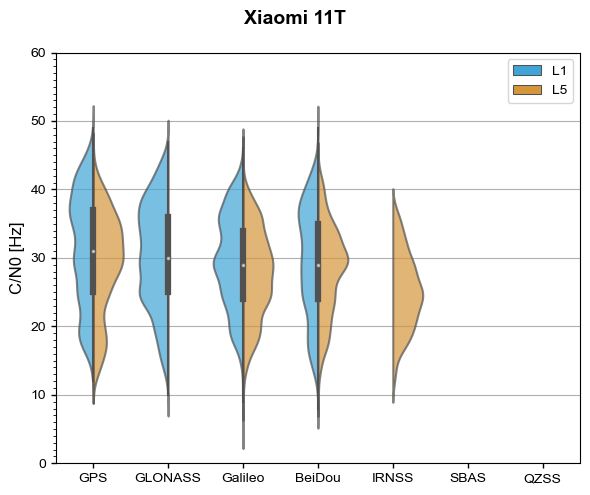

In [34]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10])

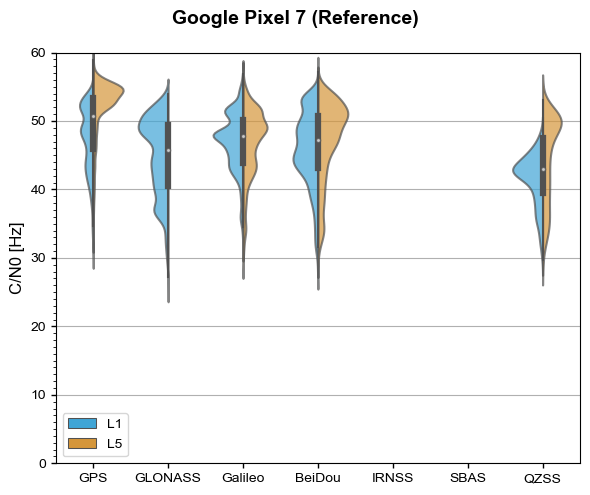

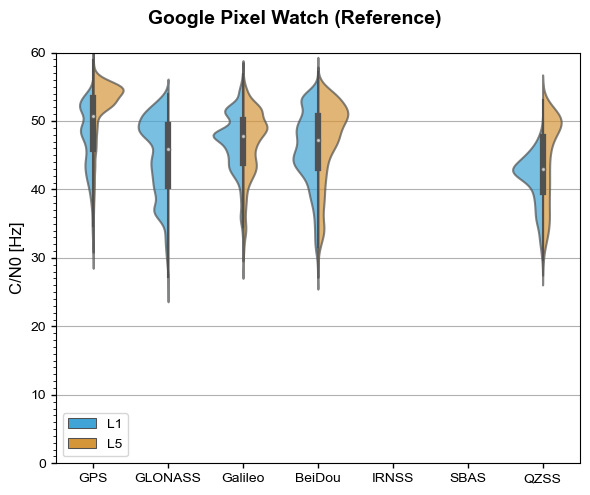

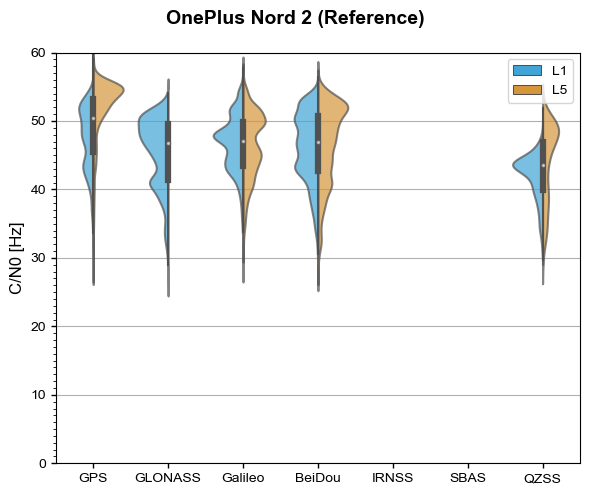

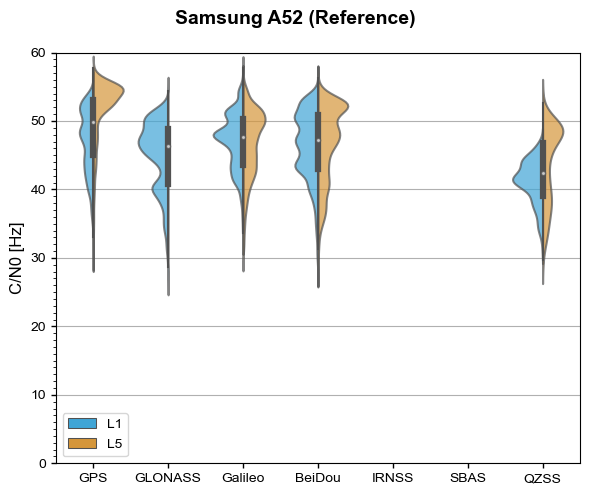

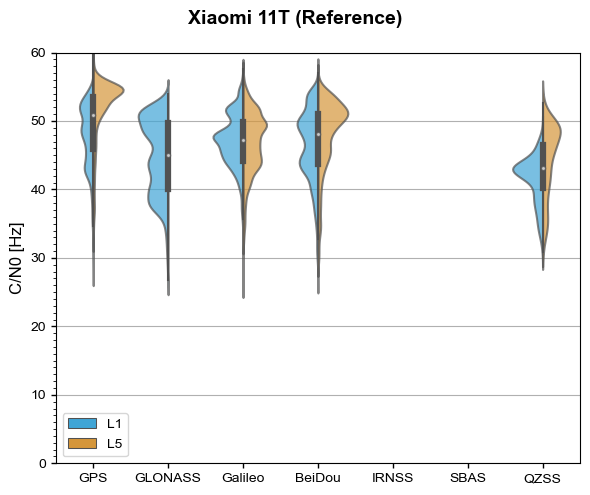

In [25]:
plotStatisticsDataViolin(
    _logs, 
    'snr', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10],
    mode='ref')